Class,

Recall that in Lec 01, we did some preprocessing of data prior to ML applications. The aim was to
- demo the ease and flexibility of colab as our learning platform
- reading in data
- basic data explorations
- basic plotting

We missed out a few things I'd wanted to demo such as
- use of feature correlations 
- some simple imputation schemes

I won't be covering that which we missed in class again. Kindly read and execute on your own at home. 

After preprocessing, time to hit the road running with our first few ML algos.

# Intro to Supervised L

Let's start with the easiest and simplest of the algos (k-nearest-neighbours or kNN) on the simplest of datasets (simulated 2-D dummy data).

See below.

In [2]:
# run ONLY if mglearn is not already installed.
!pip install mglearn

     |████████████████████████████████| 542kB 2.9MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=c49b402ab9672ea930a756d96a502e56b56a59642caa3a40b44c5676ff1faeb1
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [3]:
# setup chunk
import mglearn
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


We start with simulating a simple, small dummy dataset and a binary classification task.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


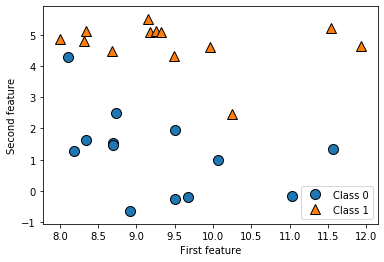

In [4]:
# simulate a dummy dataset
X, y = mglearn.datasets.make_forge()
print("X.shape:", X.shape)

# see data pattern
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# plot parms
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

Consider a simple use-case. 

Say we've only two classes. For example
- Men and Women
- Republicans & Democrats
- Loyals vs Switchers 
- etc

whose locations on some 2 features such as 

- height vs weight
- support_Trump vs oppose_Trump
- etc 

are shown in the graph above. 

P.S. Class separation is quite decent in the graph above, pls note.

Now suppose I paradrop a few more observations into this 2-D space for which the class label is not yet known.

Our task? Predict their class. 

How to go about this? What would your first approach be? The simplest thing to do might be to **coin-toss** and **randomly assign** classes, perhaps. But can we do better?

Probably the next simplest thing to do is to look at the class of people or units **closest** to the unlabeled units and assign them the same class. 

Operating assumption here would be that the feature-values determine unit class. IOW, the **nearest neighbors** to a unit are good estimators of that unit's class.

## Introducing the kNN

Let's build an intuition for kNN using *mglearn's* inbuilt figures. See below.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


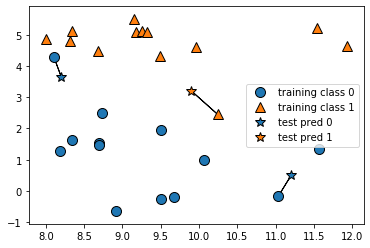

In [5]:
# demo kNN classification process
mglearn.plots.plot_knn_classification(n_neighbors=1)

The stars in the graph above are the unlabeled units for which we have to predict the class.

The kNN with k=1 simply picks the closest unit and paints it in the same color.

What if we use k=3 instead? Now, we take some weighted average of classes and proceed. See below.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


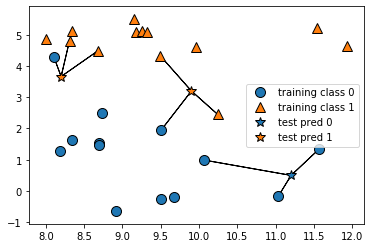

In [6]:
# kNN with weighted class of 3 nearest neighbors
mglearn.plots.plot_knn_classification(n_neighbors=3)

So, how well did we do? How to know?

To assess accuracy of the kNN algo, we (typically randomly) split the dataset into a training set and a test set.

We train the model of the training set and test the trained model on the test set. (Recall from Lec 01)

Recall that we have labels both for training and test sets but that the machine was not exposed at all to the test observations.

Hence, we can now compute what % of classes were correctly predicted versus misclassified.

See below.

In [7]:
# train-test-sets split with random seed set for reproducibility
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("Training sample size is: ", X_train.shape, " and test sample's is: ", X_test.shape)
print("\n")

# import and instantiate classifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)  # instantiate model
clf.fit(X_train, y_train)   # train model on training data

# apply trained model on test
predictions = clf.predict(X_test)  # outputs vector of predicted classes
accuracy = clf.score(X_test, y_test)  # computes classifn accuracy %

# print results
print("Test set predictions:", predictions)
print("\n")
print("Test set accuracy: ", round(accuracy, 2))

Training sample size is:  (19, 2)  and test sample's is:  (7, 2)


Test set predictions: [1 0 1 0 1 0 0]


Test set accuracy:  0.86


86%? Not bad, eh? 

Let's plot and see how kNN did its job.

And this time I'm gonna compress the code a tad. See below.

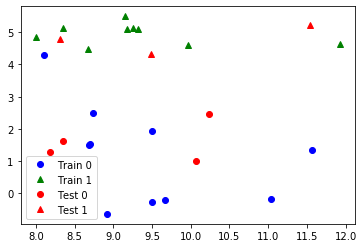

In [8]:
# plotting train & test pts separately
y_train_0 = (y_train == 0)  # make indices
y_train_1 = (y_train == 1)

y_test_0 = (predictions == 0)
y_test_1 = (predictions == 1)

plt.plot(X_train[y_train_0, 0], X_train[y_train_0, 1], 'bo', label="Train 0")
plt.plot(X_train[y_train_1, 0], X_train[y_train_1, 1], 'g^', label="Train 1")

plt.plot(X_test[y_test_0, 0], X_test[y_test_0, 1], 'ro', label="Test 0")
plt.plot(X_test[y_test_1, 0], X_test[y_test_1, 1], 'r^', label="Test 1")

plt.legend()

The red points are test data. Their shape (triangle vs circle) tells us of the class they were assigned to.

So how does the kNN predict classes? 

By **averaging** the classes of a test data point's k nearest neighbours in n-dimensional Eucledian space.

It's possible to construct a **classification boundary** for the 2 classes based on the classes and locations of training data points. 

Let's head to the slides quickly for this one.*

## kNN Regression

Recall that classification applies on nonmetric Y whereas regression applies for continuous Y.

And if we can use kNN to weight and predict classes, we could just as well use kNN to weight and predict continuous Y or target values.

In this case, the predicted Y for new observations will simply be the weighted average of the k nearest neighbours. See below.

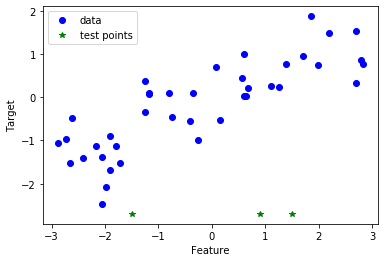

In [9]:
# simulate data for this exercise
X, y = mglearn.datasets.make_wave(n_samples=40)
test_data = [-1.5, 0.9, 1.5]

# view data scatterplot pattern
plt.plot(X, y, 'bo', label="data")
plt.plot(test_data, [-2.7, -2.7, -2.7], 'g*', label="test points")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()

Above, vertical axis is target or Y variable. Horiz axis is a feature or a (say) 1-D projection of feature set. 

Q is, given locations of new data (green stars) on the X-axis, what is their predicted Y value?

Under kNN(k=1), the predicted Y is merely the same Y as that of the nearest neighbor on the x-axis to the new data point.

See below for kNN with k=1

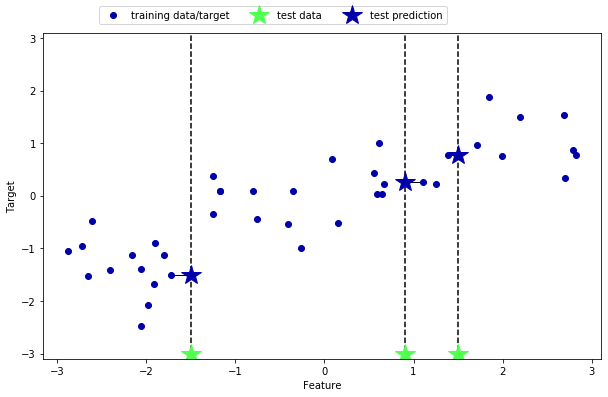

In [10]:
# demo kNN regression for k=1
mglearn.plots.plot_knn_regression(n_neighbors=1)

Same carries over as weighted mean Y of k nearest neighbors when analyzed with kNN(k=k). 

See below for k=3.

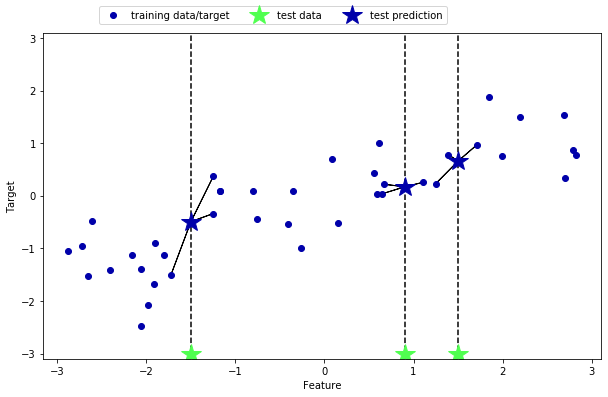

In [0]:
# for k=3
mglearn.plots.plot_knn_regression(n_neighbors=3)


Recall regressions from stats 101. Recall metrics like **R-squared** etc. 

Does a kNN also yield such?

Why not run a full-fledged example, quickly and see for ourselves?

## Visualizing kNN regression for varying k

Time to see how the kNN regresion thing works on a non-trivial dataset. See as in literally *see*.

So, to visualize this, I project the whole thing into 2-D for plot-ability. See below.

P.S. Lot of code here, will gloss over. Big picture and Code flow more important than code details. Ask offline if you want to dive into code details.

In [0]:
from sklearn.neighbors import KNeighborsRegressor
# simulate data
X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)

# fit the model using the training data and training targets
reg.fit(X_train, y_train)

print("Test set predictions:\n", reg.predict(X_test))
print("\n")
print("Test set R^2: ", round(reg.score(X_test, y_test),2))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


Test set R^2:  0.83


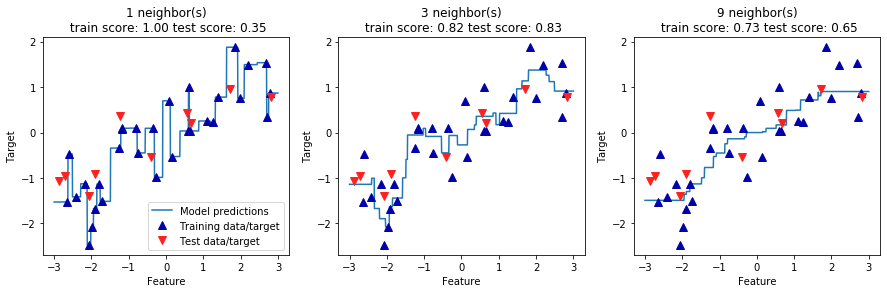

In [0]:
# setting stage to show 3 (sub)plots side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# create 1,000 data points, evenly spaced between -3 and 3
import numpy as np
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor
# loop over k=1,3,9 and over axes
for n_neighbors, ax in zip([1, 3, 9], axes):

    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)

    # plot and show	
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))

    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")


axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

Few things to note in the plots above.

- Note how the regression line (blue line connecting the blue triangle data) smoothens out and flattens out as k rises?

- Note also how the training and test score (akin to R^2) changes with k?

- At k=1 **overfits** the data (hence training RMSE=0 & score=1) but generalizes very poorly to unseen test data (score is merely 0.35).

- Seems, k=3 is ideal with test score actually beating even training score, just about!

## kNN with varying K on a real dataset

The breast_cancer dataset is a *canonical* dataset. Has some 500+ observations over 30 features (tumor characteristics) and a binary classification of 'benign' versus 'malignant'

We use the kNN and assess how model perf (in test sample prediction terms) varies with k.

Behold.

Dataset size is:  (569, 30)




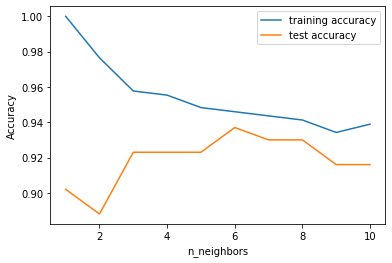

In [0]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)
print("Dataset size is: ", cancer.data.shape)
print("\n")

# deine empty lists to capture output
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

# use a for loop over k=1 to 10
for n_neighbors in neighbors_settings:

    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)

    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

# now plot the results and see    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Some things to note above.

- Using a smaller k actually corresponds to a more complex model. Higher k tends towards a more 'moving average' kind of solution.

- Overfitting and Underfitting characteristics can be seen

- For k=1, training accuracy is perfect but big gap with test accuracy indicating overfitting.

- for k=10, model becomes too simple and both training and test accuracy drop.

- Optimal perf likely happens in the middle. Around k=6 where test set perf shows a jump up. 

- All said and done, do look at the scales involved. Even the worst performing model (k=2) has an 88% accuracy!

With this, and keeping time trouble in mind, lemme hurry back to the slides now.

Voleti.